# PROJET PYTHON - REPLIQUER UNE STRATEGIE LONG/SHORT MOMEMTUM/VALUE SUR DES ACTIONS EUROPEENNES

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

### Etape 1 - Notation des actions

In [77]:
#Importation des données returns
data_action_returns = pd.read_excel("DATA.xlsx", sheet_name = "RETURNS", index_col =0) 
data_action_returns = data_action_returns.rename_axis("DATE")
data_action_returns.head()

,ANHEUSER-BUSCH INBEV SA/NV,KONINKLIJKE AHOLD DELHAIZE N,ADIDAS AG,AIR LIQUIDE SA,AIRBUS SE,ALLIANZ SE-REG,ASML HOLDING NV,BASF SE,BAYER AG-REG,BANCO BILBAO VIZCAYA ARGENTA,...,SAFRAN SA,SANOFI,BANCO SANTANDER SA,SAP SE,SIEMENS AG-REG,SCHNEIDER ELECTRIC SE,TELEFONICA SA,TOTALENERGIES SE,VIVENDI SE,VOLKSWAGEN AG-PREF
DATE,,,,,,,,,,,,,,,,,,,,,
2006-01-31,0.054383,0.003162,0.075629,0.041231,0.010972,0.036812,0.097633,0.002335,-0.026051,0.110458,...,0.076236,0.019595,0.061884,0.100177,0.055098,0.141340,-0.011803,0.070689,-0.025699,0.091075
2006-02-28,0.000543,0.077163,-0.046946,-0.021275,-0.046203,0.020732,-0.061456,-0.024685,-0.016879,0.027679,...,-0.017479,-0.053677,0.042739,0.015130,0.025850,-0.002907,0.030260,-0.071304,-0.012797,0.219389
2006-03-31,-0.002326,-0.051172,-0.005057,0.037439,0.130364,0.017577,-0.032165,0.022768,-0.021617,0.008198,...,-0.020598,0.099439,-0.016324,0.046520,0.000520,0.039068,0.000768,0.031755,0.113553,0.047422
2006-04-28,0.045571,0.009242,0.025480,-0.001745,-0.100372,-0.036871,-0.002967,0.050386,0.107398,0.027944,...,-0.027246,-0.047770,0.019916,-0.032454,-0.026485,0.007295,-0.019305,0.006891,0.021172,-0.028490
2006-05-31,-0.061532,-0.025948,-0.067838,-0.032199,-0.092904,-0.071193,-0.060119,-0.038437,-0.017612,-0.076527,...,-0.137736,-0.016054,-0.072645,-0.045965,-0.105059,-0.075689,0.025819,-0.048478,0.002404,-0.081681


In [78]:
#Importation des données Price to Book Ratio
data_action_PBR = pd.read_excel("DATA.xlsx", sheet_name = "PRICE TO BOOK", index_col=0)
data_action_PBR = data_action_PBR.rename_axis("DATE")
data_action_PBR.head()

,ANHEUSER-BUSCH INBEV SA/NV,KONINKLIJKE AHOLD DELHAIZE N,ADIDAS AG,AIR LIQUIDE SA,AIRBUS SE,ALLIANZ SE-REG,ASML HOLDING NV,BASF SE,BAYER AG-REG,BANCO BILBAO VIZCAYA ARGENTA,...,SAFRAN SA,SANOFI,BANCO SANTANDER SA,SAP SE,SIEMENS AG-REG,SCHNEIDER ELECTRIC SE,TELEFONICA SA,TOTALENERGIES SE,VIVENDI SE,VOLKSWAGEN AG-PREF
DATE,,,,,,,,,,,,,,,,,,,,,
2006-01-31,1.9489,2.6765,3.0258,2.9867,1.9480,1.3132,4.7849,1.9532,2.3268,3.1241,...,1.8357,2.1196,1.7517,8.2054,2.0402,1.9976,4.7757,3.7503,0.4728,0.5308
2006-02-28,2.1140,2.6849,3.2546,3.1099,1.9693,1.3615,5.2520,1.9577,2.2661,3.4432,...,1.9757,2.1611,1.8602,9.0273,2.1152,2.2800,4.7194,4.1308,0.4606,0.5792
2006-03-31,2.0716,2.8921,3.1018,3.0437,1.8784,1.3898,4.9293,1.9094,2.2279,3.5385,...,1.9411,2.0451,1.9246,9.1639,2.1698,2.2734,4.8622,3.7575,0.4547,0.7062
2006-04-28,2.1043,2.1745,2.9895,3.1576,1.9171,1.3497,4.5361,1.8654,2.0064,4.7312,...,1.9012,2.2485,1.8614,9.4695,2.1780,2.3622,5.3410,3.7332,0.5064,0.7204
2006-05-31,2.2616,2.1946,3.0657,3.1521,1.7247,1.2999,4.5226,1.9594,2.2219,4.8109,...,1.8494,2.1411,1.8985,9.1622,2.1780,2.3794,5.2379,3.9107,0.5171,0.6999


In [79]:
#Cleaning de data_action_returns
nan_count = data_action_returns.isnull().sum()
print(f"Nombre de NaN dans le tableau data_action_returns : \n{nan_count}")

if nan_count.sum() == 0 :
    print("Aucune valeur manquante !")

Nombre de NaN dans le tableau data_action_returns : 
ANHEUSER-BUSCH INBEV SA/NV      0
KONINKLIJKE AHOLD DELHAIZE N    0
ADIDAS AG                       0
AIR LIQUIDE SA                  0
AIRBUS SE                       0
ALLIANZ SE-REG                  0
ASML HOLDING NV                 0
BASF SE                         0
BAYER AG-REG                    0
BANCO BILBAO VIZCAYA ARGENTA    0
BAYERISCHE MOTOREN WERKE AG     0
DANONE                          0
BNP PARIBAS                     0
CRH PLC                         0
AXA SA                          0
DEUTSCHE BOERSE AG              0
VINCI SA                        0
DEUTSCHE POST AG-REG            0
DEUTSCHE TELEKOM AG-REG         0
ESSILORLUXOTTICA                0
ENEL SPA                        0
ENGIE                           0
ENI SPA                         0
FRESENIUS SE & CO KGAA          0
SOCIETE GENERALE SA             0
IBERDROLA SA                    0
ING GROEP NV                    0
INTESA SANPAOLO              

In [80]:
# Cleaning de data_action_PBR
nan_count = data_action_PBR.isnull().sum()
print(f"Nombre de NaN dans le tableau data_action_PBR : \n{nan_count}")

colonne_nan = data_action_PBR.columns[data_action_PBR.isnull().any()]
print(f"Colonnes avec NaN : \n{colonne_nan}")

for colonne in colonne_nan:
    data_action_PBR[colonne] = data_action_PBR[colonne].fillna(data_action_PBR[colonne].mean())

print(f"Nombre de NaN après remplacement : {data_action_PBR.isnull().sum().sum()}")


Nombre de NaN dans le tableau data_action_PBR : 
ANHEUSER-BUSCH INBEV SA/NV       0
KONINKLIJKE AHOLD DELHAIZE N     0
ADIDAS AG                        0
AIR LIQUIDE SA                   0
AIRBUS SE                        0
ALLIANZ SE-REG                   0
ASML HOLDING NV                  0
BASF SE                          0
BAYER AG-REG                     0
BANCO BILBAO VIZCAYA ARGENTA     0
BAYERISCHE MOTOREN WERKE AG      0
DANONE                           0
BNP PARIBAS                     24
CRH PLC                          0
AXA SA                           0
DEUTSCHE BOERSE AG               0
VINCI SA                         0
DEUTSCHE POST AG-REG             0
DEUTSCHE TELEKOM AG-REG          0
ESSILORLUXOTTICA                 0
ENEL SPA                         0
ENGIE                            0
ENI SPA                          0
FRESENIUS SE & CO KGAA           0
SOCIETE GENERALE SA             18
IBERDROLA SA                     0
ING GROEP NV                     0
INTESA

### Partie 2 - Fonctions de calcul des scores et de rebalancement

In [82]:
def recalculer_scores(df_return, df_price_to_book, month_end):
    """
    Calcule un score momentum, un score value et un score global.
    """
    # 1. Momentum score
    momentum_score = (df_return.loc[:month_end].rolling(window=12, min_periods=11).mean().shift(1).std())
    
    # 2. Value score
    inverse_pb = df_price_to_book.loc[:month_end]
    value_score = inverse_pb.std()
    
    # 3. Score global 
    new_global_score = (momentum_score + value_score) / 2
    
    return new_global_score

In [83]:
def rebalance_monthly(df_return, current_weights, global_scores, current_capital, month_end):
    """
    Rééquilibre le portefeuille mensuellement :
    - Les poids sont redéfinis proportionnellement aux scores (ou à leurs valeurs absolues).
    - On calcule le rendement mensuel en multipliant les rendements du mois par les poids actuels.
    - On met à jour le capital.
    """
    
    new_weights = global_scores / global_scores.sum()
    
    # Rendement mensuel = somme( rendement de chaque action * poids actuel )
    monthly_returns = (df_return.loc[month_end] * current_weights).sum()
    
    updated_capital = current_capital * (1 + monthly_returns)
    
    return new_weights, updated_capital

### Partie 3 - Initialisation des paramètres

In [86]:
capital_initial = 100000
capital_long = capital_initial / 2.0  
capital_short = capital_initial / 2.0 

strategy_start_date = '2008-03-01' 
capital_evolution = [] 

### Etape 4 - Boucle de backtest mensuel

In [88]:
for month_end in data_action_returns.index:
    # 1. On ignore les dates avant le début de la stratégie
    if month_end < pd.to_datetime(strategy_start_date):
        continue

    # 2. Calcul des scores (momentum, value, global)
    global_score = recalculer_scores(data_action_returns, data_action_PBR, month_end)
    
    # 3. Tri décroissant des scores pour identifier les top/bottom
    global_score_sorted = global_score.sort_values(ascending=False)
    
    # 4. Sélection des portefeuilles long/short
    long_portfolio = global_score_sorted.iloc[:15]
    short_portfolio = global_score_sorted.iloc[-15:]
    
    # 5. On récupère les scores de chaque portefeuille
    long_scores = long_portfolio
    short_scores = short_portfolio
    
    # 6. Rebalance le portefeuille long
    long_weights, capital_long = rebalance_monthly(data_action_returns[long_portfolio.index], current_weights=(long_portfolio / long_portfolio.sum()), global_scores=long_scores, current_capital=capital_long, month_end=month_end)
    
    # 7. Rebalance le portefeuille short
    short_weights, capital_short = rebalance_monthly(
        data_action_returns[short_portfolio.index],
        current_weights=(short_portfolio / short_portfolio.sum()),
        global_scores=short_scores,
        current_capital=capital_short,
        month_end=month_end
    )
    
    # 8. Calcul du capital net = capital long - capital short
    net_capital = capital_long - capital_short
    
    capital_evolution.append((month_end, net_capital))

### Etape 5 - Création d'un DataFrame pour l'évolution du capital net

In [91]:
capital_evolution_df = pd.DataFrame(capital_evolution, columns=["Date", "Net Capital"])
capital_evolution_df.set_index("Date", inplace=True)
print(capital_evolution_df.head())

            Net Capital
Date                   
2008-03-31  -537.253994
2008-04-30 -1392.757767
2008-05-30 -3039.305441
2008-06-30 -4073.026338
2008-07-31 -3773.879741


### Etape 6 - Visualisation de l'évolution du capital net

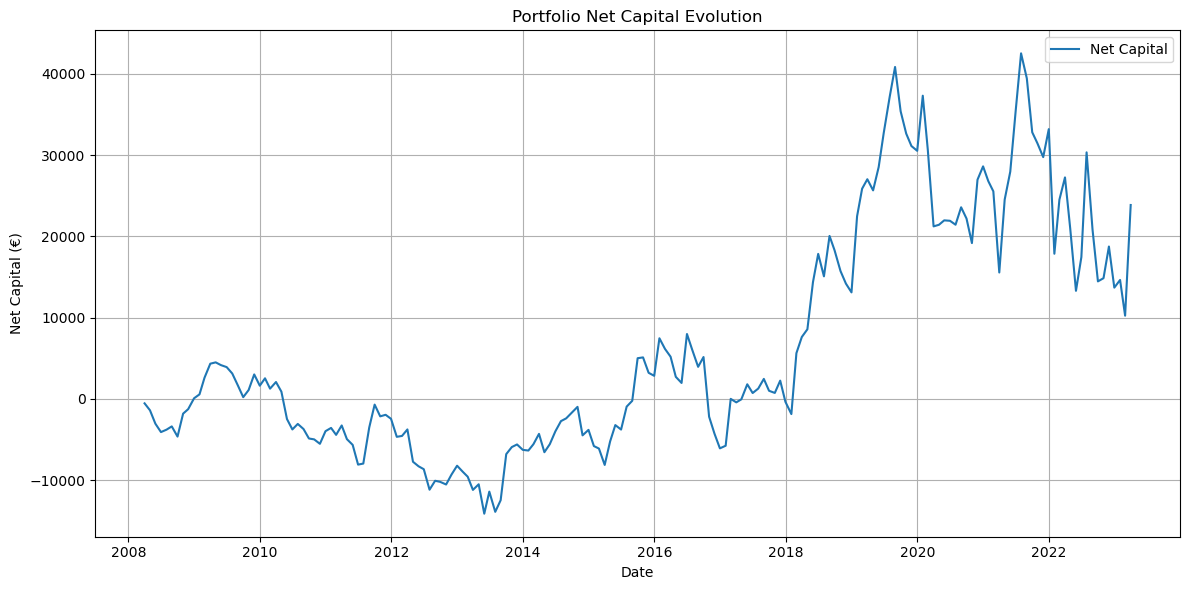

In [97]:
plt.figure(figsize=(12, 6))
plt.plot(capital_evolution_df.index, capital_evolution_df["Net Capital"], label="Net Capital")
plt.title("Portfolio Net Capital Evolution")
plt.xlabel("Date")
plt.ylabel("Net Capital (€)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Etape 7 - Ajustement du capital pour partir de 100 000 €

In [100]:
capital_evolution_df["Net Capital"] += 100000

# Capital final
initial_capital = 100000
final_capital = capital_evolution_df["Net Capital"].iloc[-1]
profitability = (final_capital - initial_capital) / initial_capital * 100

print(f"Initial Capital: €{initial_capital:.2f}")
print(f"Final Capital: €{final_capital:.2f}")
print(f"Profitability of the Long/Short Strategy: {profitability:.2f}%")


Initial Capital: €100000.00
Final Capital: €123866.48
Profitability of the Long/Short Strategy: 23.87%


### Etape 8 - Comparaison avec plusieurs indices (S&P 500, CAC 40)

In [102]:
indices = {"S&P 500": "^GSPC","CAC 40": "^FCHI","DAX": "^GDAXI","FTSE 100": "^FTSE","Nikkei 225": "^N225","Hang Seng": "^HSI"}
index_capitals = {}
start_comparison = '2008-03-01'
end_comparison   = '2023-03-31'

for name, ticker in indices.items():
    try:
        index_data = yf.download(ticker, start=start_comparison, end=end_comparison, interval='1mo')
        index_data.dropna(inplace=True)
        index_data['Monthly Return'] = index_data['Adj Close'].pct_change()
        index_capitals[name] = capital_initial * (1 + index_data['Monthly Return']).cumprod()
        
    except Exception as e:
        print(f"Error fetching data for {name}: {e}")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### Etape 9 - Tracé comparatif

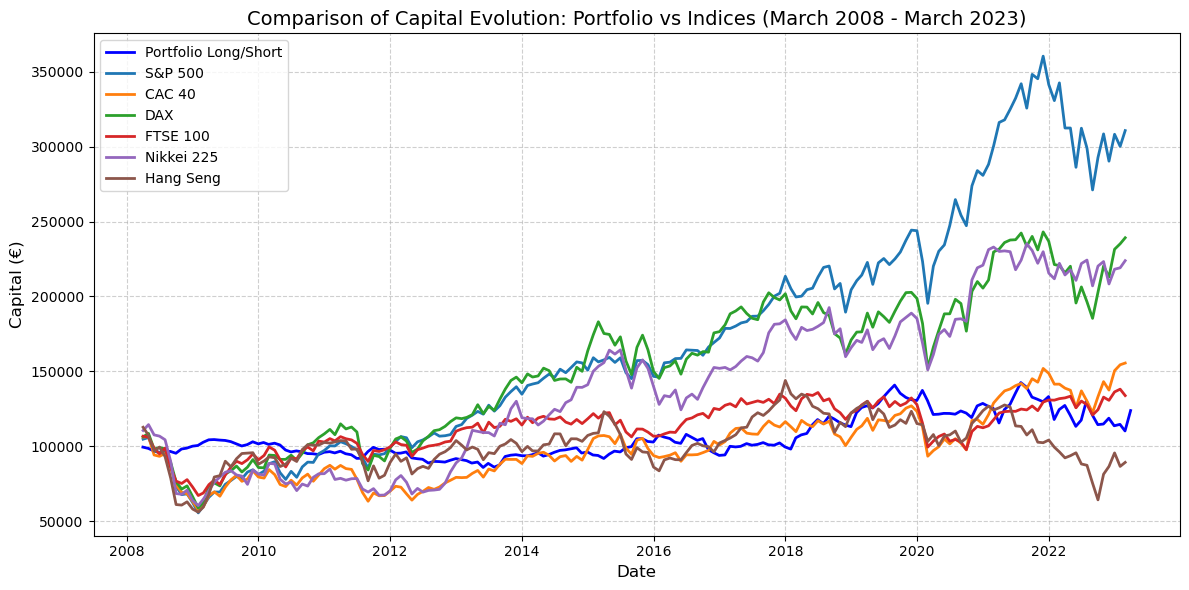

In [104]:
plt.figure(figsize=(12, 6))
plt.plot(capital_evolution_df.index,
         capital_evolution_df["Net Capital"],
         label="Portfolio Long/Short",
         linewidth=2,
         color='blue')

for name, capital_series in index_capitals.items():
    plt.plot(capital_series.index, capital_series, label=name, linewidth=2)

plt.title('Comparison of Capital Evolution: Portfolio vs Indices (March 2008 - March 2023)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Capital (€)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()